In [583]:
library('glue')

# Práctica 2

## Ejercicio 1

De un lote que contiene 15 artículos, de los cuales 4 son defectuosos, se eligen 3 artículos al azar con reposición. Si llamamos $X$ al número de artículos defectuosos entre los seleccionados:

### Pregunta A

Hallar la función de probabilidad puntual asociada a $X$ y graficarla usando R.

Sea $S = \{ (p_1, p_2, p_3) \mid p_i \in \{D_1, \dots, D_4, F_1, \dots, F_{11}\} \}$ el espacio muestral de elegir 3 artículos con reposición de un total de 15 artículos, con 4 defectuosos ($D_i$) y 11 funcionales ($F_i$).

$\#S = 15^3 = 3375$

Sea $R_X = \{0,1,2,3\}$ el rango de $X$ (el conjunto de posibles valores de la v.a. discreta $X$).

La probabilidad puntual para un valor de $x \in R_X$ es: $p_X(x) = P(X = x) = P(\{ w \in S \mid X(w) = x \})$

Ahora calculemos $p_X$ para cada $x \in R_X$:

$p_X(0) = P(X = 0) = \left( \frac{11}{15} \right)^3 \approx 0.394370$

$p_X(1) = P(X = 1) = {3 \choose 1} \frac{4}{15} \left( \frac{11}{15} \right)^2 \approx 0.4302$

$p_X(2) = P(X = 2) = {3 \choose 2} \left( \frac{4}{15} \right)^2 \frac{11}{15} \approx 0.1564$

$p_X(3) = P(X = 3) = \left( \frac{4}{15} \right)^3 \approx 0.01896$

Para cualquier valor posible $x$ de la v.a. $X$, $p_X(x)$ se calcula tomando el combinatorio $3 \choose x$ (en cuántas de las 3 elecciones de artículos puede haber un artículo defectuoso), multiplicado por la probabilidad de elegir $x$ artículos defectuosos: $\left( \frac{4}{15} \right)^x$, y finalmente multiplicado por la probabilidad de elegir $3-x$ artículos funcionales: $\left( \frac{11}{15} \right)^{3-x}$.

$p_X(x) = {3 \choose x} \left( \frac{4}{15} \right)^x \left( \frac{11}{15} \right)^{3-x}$

In [926]:
R_X = 0:3
p_X = function(x) choose(3,x) * (4/15)^x * (11/15)^(3-x)
P = sapply(R_X, p_X)

Veamos si coinciden los valores calculados previamente con la fórmula encontrada:

In [829]:
P

[1] 0.39437037 0.43022222 0.15644444 0.01896296

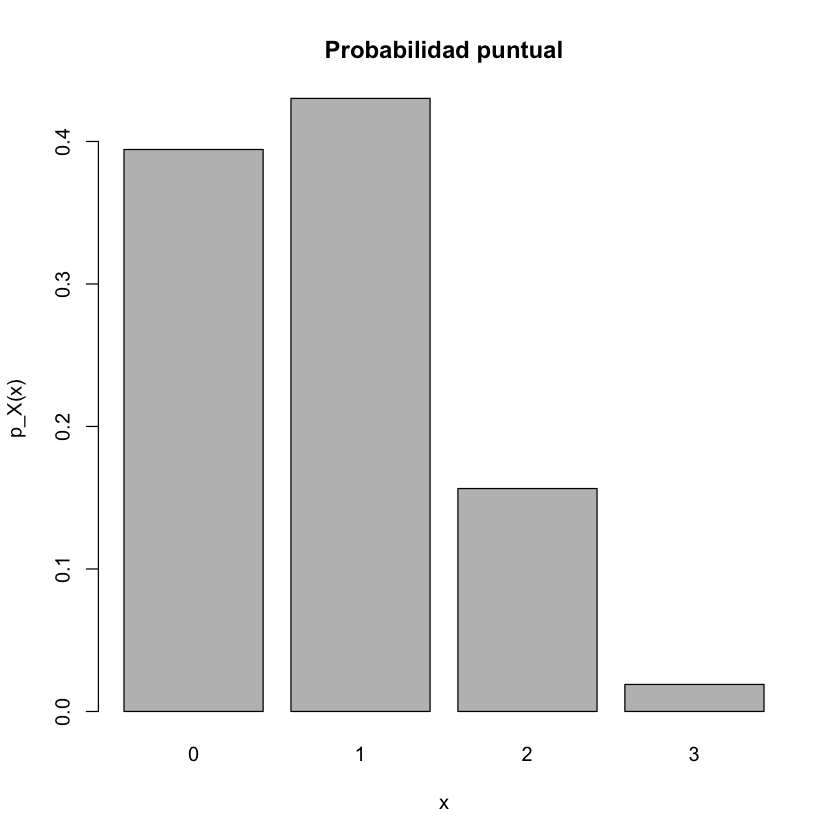

In [830]:
barplot(P, main='Probabilidad puntual', xlab='x', ylab='p_X(x)', names.arg=R_X)

### Pregunta B

¿Cuál es la probabilidad de que al menos 2 artículos sean defectuosos?

$x \geq 2 \rightarrow P(X \geq 2) = p_X(2) + P_X(3)$

In [831]:
p_X(2) + p_X(3)

[1] 0.1754074

Otra forma:

$x \geq 2 \rightarrow P(X \geq 2) = 1 - P(X < 2) = 1 - (p_X(0) + p_X(1))$

In [832]:
1 - (p_X(0) + p_X(1))

[1] 0.1754074

### Pregunta C

Hallar la función de distribución acumulada de $X$ y graficarla usando R.

$F_X(x) = P(X \leq x) = \sum_{y \in R_X, y \leq x} p_X(y)$

In [844]:
F_X = function(x) sum(p_X(R_X[R_X <= x]))

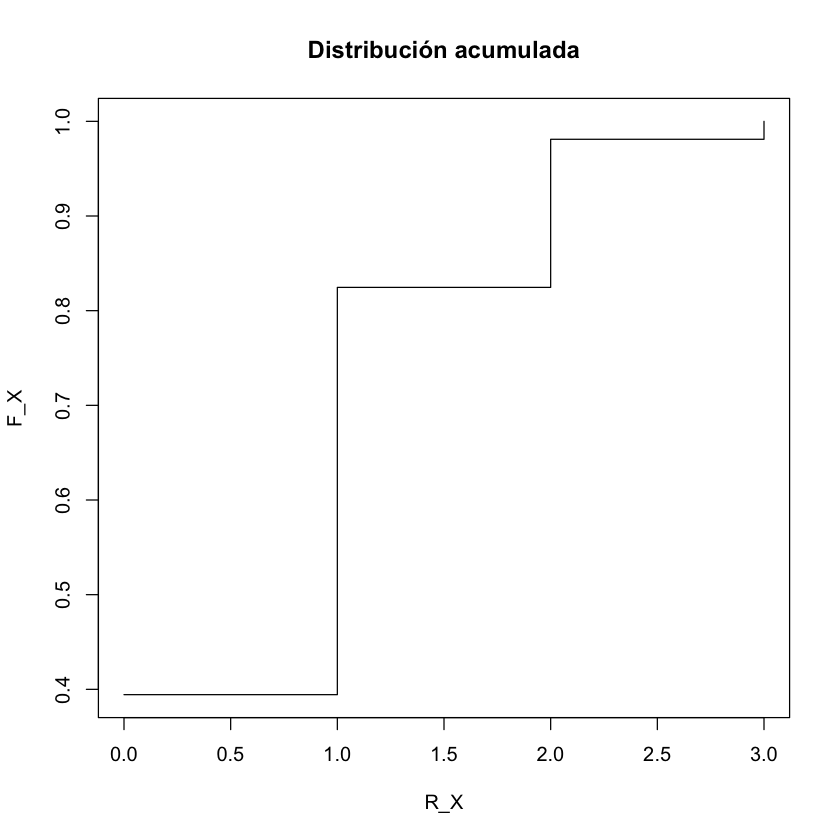

In [846]:
plot(R_X, sapply(R_X, F_X), type='s', main='Distribución acumulada', ylab='F_X')

### Pregunta D

Estimar mediante una simulación las probabilidades calculadas en el item a).

In [857]:
articulos = c(rep('D', 4), rep('F', 11))
n = 100000

experimento = function(x) {
    seleccionados = sample(articulos, size=3, replace=TRUE)
    return = sum(seleccionados == 'D') == x
}

x = 0:3
p = rowSums(replicate(n, experimento(x))) / n
print(glue('p_X({x}) = {p}'))

p_X(0) = 0.39363
p_X(1) = 0.43287
p_X(2) = 0.15502
p_X(3) = 0.01848


## Ejercicio 2

Sea $X$ una variable aleatoria con función de distribución:

$
F_X(x) =
\begin{cases}
  0 & \text{si } x < 1 \\
  0.3 & \text{si } 1 \leq x < 3 \\
  0.4 & \text{si } 3 \leq x < 6 \\
  0.6 & \text{si } 6 \leq x < 12 \\
  1 & \text{si } 12 \leq x
\end{cases}
$

### Pregunta A

Hallar la función de probabilidad puntual de X.

$P_X(x) = F_X(x) - F_X(x^-)$

Consideramos todos los $x$ donde $F_X$ pega un salto. Esto sucede en las cotas inferiores de los intervalos de partición de $F_X$.

$P_X(1) = F_X(1) - F_X(1^-) = 0.3 - 0 = 0.3$

$P_X(3) = F_X(3) - F_X(3^-) = 0.4 - 0.3 = 0.1$

$P_X(6) = F_X(6) - F_X(6^-) = 0.6 - 0.4 = 0.2$

$P_X(12) = F_X(12) - F_X(12^-) = 1 - 0.6 = 0.4$

Con esta información podemos definir $P_X$ de la siguiente forma:

$
P_X(x) =
\begin{cases}
  0.3 & \text{si } x = 1 \\
  0.1 & \text{si } x = 3 \\
  0.2 & \text{si } x = 6 \\
  0.4 & \text{si } x = 12
\end{cases}
$

### Pregunta B

Calcular de dos maneras las siguientes probabilidades:

**Utilizando la función de distribución**

$P(3 < X \leq 6) = F_X(6) - F_X(3) = 0.6 - 0.4 = 0.2$

$P(3 \leq X \leq 6) = F_X(6) - F_X(3^-) = 0.6 - 0.3 = 0.3$

$P(X \geq 4) = 1 - F_X(4^-) = 1 - 0.4 = 0.6$

$P(X \geq 6) = 1 - F_X(6^-) = 1 - 0.4 = 0.6$

**Utilizando la función de probabilidad puntual**

$P(3 < X \leq 6) = P_X(6) = 0.2 = 0.2$

$P(3 \leq X \leq 6) = P_X(3) + P_X(6) = 0.1 + 0.2 = 0.3$

$P(X \geq 4) = P_X(6) + P_X(12) = 0.2 + 0.4 = 0.6$

$P(X \geq 6) = P_X(6) + P_X(12) = 0.2 + 0.4 = 0.6$

### Pregunta C

Utilizando el comando `sample`, generar 5 realizaciones de esta variable aleatoria en R.

El chiste acá es usar el parámetro `prob` del comando `sample` para pasarle un vector de probabilidades asociadas a cada valor de $x$.

In [861]:
x = c(1, 3, 6, 12)
p = c(0.3, 0.1, 0.2, 0.4)
n = 5
sample(x, n, replace=TRUE, prob=p)

[1]  3  6 12 12  1

### Pregunta D

Mediante una simulación, estimar las probabilidades del item b).

In [863]:
x = c(1, 3, 6, 12)
p = c(0.3, 0.1, 0.2, 0.4)
n = 100000

simular = function(condición) {
    resultados = sample(x, n, replace=TRUE, prob=p)
    p = length(Filter(condición, resultados)) / n
    print(glue('P({match.call()[2]}) = {p}'))
}

simular(function(X) 3 < X & X <= 6)
simular(function(X) 3 <= X & X <= 6)
simular(function(X) X >= 4)
simular(function(X) X >= 6)

P(function(X) 3 < X & X <= 6) = 0.20072
P(function(X) 3 <= X & X <= 6) = 0.30083
P(function(X) X >= 4) = 0.59839
P(function(X) X >= 6) = 0.59632


## Ejercicio 3

Definir una función en R que, dados dos vectores $x = (x_1, \dots, x_n)$ y $p = (p_1, \dots, p_n)$ y un número real $t$, calcule $F_X(t)$, es decir, la probabilidad de que de la variable aleatoria discreta que toma valores $x_1, \dots, x_n$ con probabilidades $p_1, \dots, p_n$ respectivamente, sea menor o igual que $t$. Probarla con la variable aleatoria del ejercicio 2.

In [876]:
F_X = function(x, p, t) sum(p[x <= t])
x = c(1, 3, 6, 12)
p = c(0.3, 0.1, 0.2, 0.4)

for (t in c(0, 1, 3, 6, 12)) {
    print(glue('F_X(t={t}) = {F_X(x, p, t)}'))
}

F_X(t=0) = 0
F_X(t=1) = 0.3
F_X(t=3) = 0.4
F_X(t=6) = 0.6
F_X(t=12) = 1


## Ejercicio 4

Si $X$ es una v.a. discreta que toma solo valores enteros, probar que para todo $k \in \mathbb{Z}: p_X(k) = F_X(k) - F_X(k - 1)$

Esto sale directo de la definición:

$p_X(k) = F_X(k) - F_X(k^-) = F_X(k) - F_X(\lim_{h \to 0^+} k - h)$

Como $X$ toma valores en $\mathbb{Z}$ se cumple que $x_1 < x_2 < x_3 < \dots$ ($\mathbb{Z}$ es un conjunto infinito numerable), entonces $F_X(\lim_{h \to 0^+} k - h) = F_X(k - 1)$ y por lo tanto:

$p_X(k) = F_X(k) - F_X(k - 1)$ como se quería probar.

## Ejercicio 5

Calcular la esperanza de la variable aleatoria definida en el ejercicio 1 utilizando la definición y estimarla usando una simulación. Comparar los resultados.

Recordando el ejercicio 1:

$R_X = \{0,1,2,3\}$

$p_X(0) \approx 0.394370$

$p_X(1) \approx 0.4302$

$p_X(2) \approx 0.1564$

$p_X(3) \approx 0.01896$

Por la definición de $E(X)$ tenemos:

$E(X) = \sum_{x \in R_X} x p_X(x) \approx 0 * 0.394370 + 1 * 0.4302 + 2 * 0.1564 + 3 * 0.01896 \approx 0.79988$

In [896]:
articulos = c(rep('D', 4), rep('F', 11))
n = 100000

experimento = function(x) {
    seleccionados = sample(articulos, size=3, replace=TRUE)
    return = sum(seleccionados == 'D') == x
}

x = 0:3
p = rowSums(replicate(n, experimento(x))) / n
e = sum(x * p)
e

[1] 0.79625

## Ejercicio 6

Definir una función en R que, dados dos vectores $x = (x_1, \dots, x_n)$ y $p = (p_1, \dots, p_n)$ calcule la **esperanza** de la variable aleatoria discreta que toma valores $x_1, \dots, x_n$ con probabilidades $p_1, \dots, p_n$ respectivamente. Probar que funciona para la variable aleatoria $X$ del ejercicio 1.

In [902]:
p_X = function(x) choose(3,x) * (4/15)^x * (11/15)^(3-x)
x = 0:3
p = p_X(x)

calcularEsperanza = function(x, p) sum(x * p)
calcularEsperanza(x, p)

[1] 0.8

## Ejercicio 7

Definir una función en R que, dados dos vectores $x = (x_1, \dots, x_n)$ y $p = (p_1, \dots, p_n)$ calcule la **varianza** de la variable aleatoria discreta que toma valores $x_1, \dots, x_n$ con probabilidades $p_1, \dots, p_n$ respectivamente. Probar que funciona para la variable aleatoria $X$ del ejercicio 1.

In [903]:
p_X = function(x) choose(3,x) * (4/15)^x * (11/15)^(3-x)
x = 0:3
p = p_X(x)

# Calculado con sumatoria
calcularVarianza1 = function(x, p) sum((x - calcularEsperanza(x, p))^2 * p)

# Calculado con la fórmula V(X) = E(X^2) - E(X)^2
calcularVarianza2 = function(x, p) calcularEsperanza(x^2, p) - calcularEsperanza(x, p)^2

calcularVarianza1(x, p)
calcularVarianza2(x, p)

[1] 0.5866667

[1] 0.5866667

## Ejercicio 8

Sea $X$ una v.a. con distribución Bernoulli de parámetro $p$.

Por tener distribución Bernoulli, vale lo siguiente:

$R_X = \{0,1\}$ (0 = fracaso, 1 = éxito)

$p_X(0) = 1 - p$

$p_X(1) = p$

### Pregunta A

Calcular $E(X^k)$ para $k \in \mathbb{N}$.

$E(X^k) = \sum_{x \in R_X} x^2 p_X(x) = 0^k * p_X(0) + 1^k * p_X(1) = 0^k * (1 - p) + 1^k * p = p$

### Pregunta B

Mostrar que $V(X) = p(1−p)$.

Por definición:

$
\begin{align*}
V(X)
&= \sum_{x \in R_X} (x - E(x))^2 p_X(x) \\
&= \sum_{x \in R_X} (x - p)^2 p_X(x) \\
&= (0 - p)^2 * p_X(0) + (1 - p)^2 * p_X(1) \\
&= p^2 * (1 - p) + (1 - p)^2 * p \\
&= p^2 - p^3 + (p^2 + 1 - 2p) * p \\
&= p^2 - p^3 + p^3 + p - 2p^2 \\
&= p - p^2 \\
&= p(1 - p)
\end{align*}
$

Por fórmula:

$V(X) = E(X^2) - E(X)^2 = p - p^2 = p(1 - p)$

## Ejercicio 9

El 70% de las consultas de un sistema interactivo de computación requiere de acceso a bases de datos. Un sistema recibe 25 consultas independientes unas de otras.

$X$ = "cantidad de consultas que requieren acceso a bases de datos"

$X \sim Bi(25, 0.7)$ ($X$ v.a. con distribución binomial con parámetros $n=25$, $p=0.7$)

### Pregunta A

Cuál es la probabilidad de que:

**i. ¿Exactamente 20 consultas requieran acceso a una base de datos?**

Recuerdo: $p_X(x) = {n \choose x} p^x (1-p)^{n-x}$

$P(X=20) = p_X(20) = {25 \choose 20} * 0.7^{20} * (1-0.7)^{25-20} = {25 \choose 20} * 0.7^{20} * 0.3^5 \approx 0.103016$

In [806]:
dbinom(20, 25, 0.7)

[1] 0.1030165

**ii. ¿El número de consultas que requieran acceso a una base de datos esté entre 20 y 24 inclusive?**

$P(20 \leq X \leq 24) = \sum_{x=20}^{24} p_X(x) \approx 0.193354$

In [905]:
sum(dbinom(20:24, 25, 0.7))

[1] 0.1933543

Otra forma es usando la función de distribución acumulada $F_X$:

$P(20 \leq X \leq 24) = F_X(24) - F_X(20^-) = F_X(24) - F_X(19) \approx 0.193354$

In [769]:
pbinom(24, 25, 0.7) - pbinom(19, 25, 0.7)

[1] 0.1933543

### Pregunta B

Calcular el valor esperado y la varianza del número de consultas que requieren acceso a una base de datos.

$E(X) = np = 25 * 0.7 = 17.5$

$V(X) = np(1 - p) = 25 * 0.7 * (1 - 0.7) = 25 * 0.7 * 0.3 = 5.25$

## Ejercicio 10

Se tienen dos dados, uno equilibrado y el otro cargado en el cual los números 1 y 2 tienen probabilidad 1/3 y el resto 1/12. Se elige un dado al azar y se lo arroja tres veces (independientemente). Sea X el número de veces que sale 1 ó 2.

### Pregunta A

¿Cuál es la distribución de $X$ condicional a que se eligió el dado cargado?

$X \sim Bi(3, \frac{2}{3})$

### Pregunta B

Hallar una expresión general para $p_X(k)$.

Con el dado equilibrado $D_E$ tenemos probabilidad $\frac{2}{6} = \frac{1}{3}$ de que salga 1 ó 2.

Con el dado cargado $D_C$ tenemos probabilidad $\frac{2}{3}$ de que salga 1 ó 2.

El dado se elige al azar, así que hay $\frac{1}{2}$ de probabilidad de elegir uno u otro, y estos son casos disjuntos.

Por el teorema de la probabilidad total vale que $P(X=k) = P(X=k|D_E)P(D_E) + P(X=k|D_C)P(D_C)$

$
\begin{align*}
p_X(k)
&= \left( \frac{1}{2} {3 \choose k} \left( \frac{1}{3} \right) ^k \left( \frac{2}{3} \right) ^{3-k} \right) + \left( \frac{1}{2} {3 \choose k} \left( \frac{2}{3} \right) ^k \left( \frac{1}{3} \right) ^{3-k} \right) \\
&= \frac{1}{2} {3 \choose k} \left( \left( \frac{1}{3} \right) ^k \left( \frac{2}{3} \right) ^{3-k} + \left( \frac{2}{3} \right) ^k \left( \frac{1}{3} \right) ^{3-k} \right)
\end{align*}
$

## Ejercicio 11

Para verificar si se cumplen las normas establecidas para arrojar residuos al río Reconquista, un inspector visita al azar 10 de las 50 industrias establecidas a orillas de dicho río.

### Pregunta A

Si en realidad 35 industrias no cumplen con alguna de las normas, ¿cuál es la distribución del número de industrias visitadas que están en infracción? Calcular la probabilidad de que 6 de las industrias visitadas estén en infracción.

Es una distribución hipergeométrica con parámetros $N=50$, $D=35$, $n=10$. El "éxito" en este contexto es detectar una empresa en infracción.

$X \sim H(10, 50, 35)$

$p_X(x) = \frac{{D \choose x}{N - D \choose n - x}}{N \choose n}$

In [803]:
x = 6
n = 10
N = 50
D = 35
p_X = function(x) (choose(D, x) * choose(N-D, n-x)) / choose(N, n)
p_X(x)

[1] 0.2156886

In [804]:
# Usando la función que viene con R
dhyper(x, D, N-D, n)

[1] 0.2156886

### Pregunta B

Si hay 500 industrias de las cuales 350 están en infracción, aproximar la distribución de (a) por una más simple. Calcular nuevamente la probabilidad de que 6 de las industrias visitadas estén en infracción.

Se puede modelar con una distribución binomial con parámetros $n = 10$ y $p = \frac{350}{500} = 0.7$.

$Y \sim Bi(10, 0.7)$

$p_Y(y) = {n \choose y} p^y (1-p)^{n-y}$

$p_Y(6) = {10 \choose 6} * 0.7^6 * (1-0.7)^{10-6} = 0.200120949$

In [818]:
dbinom(6, 10, 0.7)

[1] 0.2001209

### Pregunta C

Sea $X$ el número de fábricas que están en infracción entre las 10 visitadas. Calcular $E(X)$ y $V(X)$ para las distribuciones exacta (a) y aproximada (b).

**Distribución exacta hipergeométrica X**

$E(X) = n \frac{D}{N} = 10 \frac{35}{50} = 7$

$V(X) = \frac{N-n}{N-1} n \frac{D}{N} \left(1 - \frac{D}{N}\right) = \frac{50-10}{50-1} 10 \frac{35}{50} \left(1 - \frac{35}{50}\right) \approx 1.714285$

**Distribución aproximada binomial Y**

$E(Y) = np = 10 * 0.7 = 7$

$V(Y) = np(1-p) = 10 * 0.7 (1 - 0.7) = 2.1$

## Ejercicio 12

Una rueda de ruleta está dividida en 38 secciones, de las cuales 18 son rojas, 18 son negras y las 2 restantes son verdes. Sea $X$ el número necesario de juegos hasta obtener una sección verde en jugadas independientes.

Consideramos éxito cuando se obtiene una sección verde: $P(\text{Éxito}) = \frac{2}{38} = \frac{1}{19}$

La v.a. $X$ tiene distribución geométrica: $X \sim G(\frac{1}{19})$ con parámetro $p=\frac{1}{19}$

### Pregunta A

¿Cuál es la probabilidad de que sean necesarias al menos 4 jugadas?

Función de probabilidad puntual: $p_X(x) = p(1-p)^{x-1}$

$
\begin{align*}
P(X \geq 4)
&= 1 - P(X < 4) \\
&= 1 - (p_X(1) + p_X(2) + p_X(3)) \\
&= 1 - \left( \frac{1}{19} \left(1 - \frac{1}{19}\right) ^ {1-1} + \frac{1}{19} \left(1 - \frac{1}{19}\right) ^ {2-1} + \frac{1}{19} \left(1 - \frac{1}{19}\right) ^ {3-1} \right) \\
&= 1 - \left( \frac{1}{19} + \frac{1}{19} \left(1 - \frac{1}{19}\right) + \frac{1}{19} \left(1 - \frac{1}{19}\right) ^ {2} \right) \\
& \approx 0.850269
\end{align*}
$

Las funciones de R de la distribución geométrica están definidas sutilmente distintas a nuestra definición. En vez de ser $X$ = "número de repeticiones hasta el primer éxito" está definida como $X$ = "número de fracasos antes del primer éxito".

Entonces si queremos calcular $P(X=4)$, en las funciones de R tenemos que pensarlo como $P(X=3)$ (porque si en la 4ta repetición obtenemos un éxito, significa que hubieron 3 fracasos anteriormente).

Ojo, esto depende cómo esté definida nuestra v.a. en el enunciado o en nuestra resolución. Si se define igual a cómo la considera R entonces no hay que hacer ninguna transformación.

In [917]:
# Sumando las probabilidades puntuales
1 - dgeom(0, 1/19) - dgeom(1, 1/19) - dgeom(2, 1/19)

[1] 0.8502697

In [919]:
# Usando la distribución acumulada
1 - pgeom(2, 1/19)

[1] 0.8502697

### Pregunta B

Hallar la función de distribución acumulada de la v.a. $X$.

$F_X(x) = \begin{cases}
  0 & \text{si } x < 1 \\
  1 - (1-p)^{\lfloor x \rfloor} & \text{si } x \geq 1
\end{cases} = \begin{cases}
  0 & \text{si } x < 1 \\
  1 - \left(\frac{18}{19}\right)^{\lfloor x \rfloor} & \text{si } x \geq 1
\end{cases}$

### Pregunta C

Si fueron necesarias 7 o más jugadas, ¿cuál es la probabilidad de que se necesiten al menos 10 jugadas? Comparar con (a).

La distribución geométrica tiene la propiedad de "falta de memoria": la probabilidad de conseguir un éxito después de $n+m$ fracasos sabiendo que ya hubieron $n$ fracasos es la misma probabilidad que conseguir un éxito después de $n+m-n = m$ fracasos. Es decir, nos "olvidamos" de los primeros $n$ fracasos.

Acá está mejor explicado con su demostración: https://www.ugr.es/~cdpye/CursoProbabilidad/pdf/P_T05_OlvidoGeometrica.pdf

Utilizando la función de distribución acumulada, primero buscamos una fórmula para calcular fácilmente $P(X \geq x)$:

$P(X \geq x) = 1 - P(X < x) = 1 - F_X(x-1) = 1 - \left(1 - \left(\frac{18}{19}\right)^{x-1}\right) = \left(\frac{18}{19}\right)^{x-1}$

Luego, sin utilizar la propiedad de falta de memoria, calculemos la probabilidad que pide el enunciado:

$P(X \geq 10|X \geq 7) = \frac{P(X \geq 10 \cap X \geq 7)}{P(X \geq 7)} = \frac{P(X \geq 10)}{P(X \geq 7)} = \frac{\left(\frac{18}{19}\right)^9}{\left(\frac{18}{19}\right)^6} = \left(\frac{18}{19}\right)^3 \approx 0.850269$

Utilizando la propiedad de falta de memoria:

$P(X > 9|X > 6) = P(X > (9-6)) = P(X > 3) = P(X \geq 4)$

Si queremos que coincida exactamente con la fórmula de los apuntes podemos escribirlo así:

Sean $n=6$, $m=3$. $P(X > n+m|X > n) = P(X > m) = P(X > 3) = P(X \geq 4)$

Observemos que $P(X \geq 4)$ es lo que calculamos en (a).

### Pregunta D

¿Cuál es la probabilidad de que sea necesario un número impar de jugadas?

$I = \{ n \in \mathbb{N}_0 \mid n \text{ impar} \} \subset X$

$
\begin{align*}
P(I)
&= p_X(\{1\} \cup \{3\} \cup \{5\} \cup \dots \cup \{2k+1\}) \\
&= \sum_{k=0}^{\infty} p(1-p)^{2k} \\
&= \sum_{k=0}^{\infty} \frac{1}{19}\left(\frac{18}{19}\right)^{2k} \\
&= \frac{1}{19} \sum_{k=0}^{\infty} \left(\frac{18^2}{19^2}\right)^k \hskip1em \text{Es una serie geométrica que converge pues:} \frac{18^2}{19^2} < 1 \\
&= \frac{1}{19} \frac{1}{1 - \frac{18^2}{19^2}} \\
&= \frac{19}{37} \approx 0.513
\end{align*}
$

### Pregunta E

Hallar $E(X)$ y $V(X)$.

$E(X) = \frac{1}{p} = \frac{1}{\frac{1}{19}} = 19$

$V(X) = \frac{1-p}{p^2} = \frac{1 - \frac{1}{19}}{\left( \frac{1}{19} \right) ^2} = 342$

## Ejercicio 13

Si en el ejercicio anterior se define $Y$ = número de juegos hasta obtener exactamente tres secciones verdes.

### Pregunta A

¿Qué distribución tiene la v.a. $Y$?

Tiene una distribución binomial negativa con parámetros $r=3$, $p=\frac{1}{19}$.

$Y \sim BN(3, \frac{1}{19})$

### Pregunta B

¿Cuál es la probabilidad de que se requieran exactamente 5 jugadas?

$p_Y(y) = {y-1 \choose r-1} p^r (1-p)^{y-r}$

$P(Y=5) = p_Y(5) = {5-1 \choose 3-1} \left( \frac{1}{19} \right) ^ 3 \left( 1 - \frac{1}{19} \right) ^ {5-3} \approx 0.0007851$

Las funciones de R de la distribución binomial negativa en vez de recibir $x$ = cantidad de repeticiones totales (éxitos + fracasos) espera recibir la cantidad de fracasos (el total de repeticiones se determina sumando los fracasos + éxitos).

In [940]:
y = 5 # Cantidad total de repeticiones
r = 3 # Cantidad de éxitos
p = 1/19 # Probabilidad de éxito

dnbinom(y-r, r, p)

[1] 0.0007851059

### Pregunta C

Hallar $E(Y)$ y $V(Y)$.

$E(Y) = \frac{r}{p} = \frac{3}{\frac{1}{19}} = 57$

$V(X) = \frac{r(1-p)}{p^2} = \frac{3\left(1 - \frac{1}{19}\right)}{\left( \frac{1}{19} \right) ^2} = 1026$

## Ejercicio 14

Con el fin de encontrar una palabra clave, un motor de búsqueda de internet explora una secuencia de sitios de la WEB en orden aleatorio. Al iniciar la búsqueda, el motor elige, al azar y con igual probabilidad, una entre dos secuencias posibles de sitios. Se sabe que el 10% de los sitios de la primera secuencia contienen esta palabra clave, mientras que sólo el 5% de los sitios de la segunda contienen dicha palabra.

### Pregunta A

Si la búsqueda termina ni bien se encuentra un sitio que contenga la palabra clave, ¿cuál es la probabilidad de que más de 5 sitios deban ser explorados?

$S_i$ = "secuencia i de sitios"

$S_i \cap S_j = \emptyset$ $\forall i \neq j$

$P(S_i) = \frac{1}{2}$ $\forall i$

$X$ = "número de sitios que deben ser explorados hasta encontrar la palabra clave"

$X \sim G(p)$ El parámetro $p$ depende de la secuencia en donde se está buscando.

$X|S_1 \sim G(\frac{1}{10})$

$X|S_2 \sim G(\frac{1}{20})$

$
\begin{align*}
P(X > 5)
&= P((X > 5) \cap S_1) + P((X > 5) \cap S_2) \\
&= P(X|S_1 > 5)P(S_1) + P(X|S_2 > 5)P(S_2) \\
&= (1 - P(X|S_1 \leq 5))P(S_1) + (1 - P(X|S_2 \leq 5))P(S_2) \\
&= (1 - F_{X|S_1}(5))P(S_1) + (1 - F_{X|S_2}(5))P(S_2) \\
&= \left(1 - \left(1 - \left(1 - \frac{1}{10}\right)^5\right)\right)\frac{1}{2} + \left(1 - \left(1 - \left(1 - \frac{1}{20}\right)^5\right)\right)\frac{1}{2} \\
&\approx 0.682135
\end{align*}
$

In [949]:
(1 - pgeom(4, 1/10)) * 1/2 + (1 - pgeom(4, 1/20)) * 1/2

[1] 0.6821355

### Pregunta B

Si se sabe que el motor de búsqueda encontró la palabra clave en la sexta visita ¿cuál es la probabilidad de que la haya encontrado en la segunda secuencia?

$P(S_2|(X = 6)) = \frac{P(S_2 \cap (X = 6))}{P(X = 6)} = \frac{P(X|S_2 = 6)P(S_2)}{P(X|S_1 = 6)P(S_1) + P(X|S_2 = 6)P(S_2)} \approx 0.395844$

In [950]:
(dgeom(5, 1/20) * 1/2) / (dgeom(5, 1/10) * 1/2 + dgeom(5, 1/20) * 1/2)

[1] 0.3958443

### Pregunta C

Si la búsqueda termina cuando se encuentran 2 sitios que contenga la palabra clave ¿cuál es la probabilidad de que deban explorarse exactamente 10 sitios?

Usemos otra distribución que modela mejor el problema.

$Y$ = "número de sitios que deben ser explorados hasta encontrar la palabra clave en exactamente $r$ sitios"

Igual que antes, el parámetro $p$ de la distribución depende de la secuencia en donde se esté buscando.

$Y|S_1 \sim BN(2, \frac{1}{10})$

$Y|S_2 \sim BN(2, \frac{1}{20})$

$
\begin{align*}
P(Y = 10)
&= P((Y = 10) \cap S_1) + P((Y = 10) \cap S_2) \\
&= P(Y|S_1 = 10)P(S_1) + P(Y|S_2 = 10)P(S_2) \\
&\approx 0.026834
\end{align*}
$

In [952]:
dnbinom(8, 2, 1/10) * 1/2 + dnbinom(8, 2, 1/20) * 1/2

[1] 0.0268345

## Ejercicio 15

Un minorista ha verificado que la demanda semanal de cajones de cierto producto es una v.a. con distribución de Poisson de parámetro $\lambda = 2$. Completa su existencia los lunes por la mañana de manera de tener 4 cajones al principio de la semana. Al efectuar un análisis de la actividad de su negocio, se le plantean las siguientes preguntas:

$X \sim P(2)$

### Pregunta A

¿Cuál es la probabilidad de vender todo su stock durante la semana?

$P(X \geq 4) = 1 - P(X \leq 3) = 1 - F_X(3) \approx 0.142876$

In [958]:
1 - ppois(3, 2)

[1] 0.1428765

### Pregunta B

¿Cuál es la probabilidad de que sea incapaz de cumplir con un pedido por lo menos?

$P(X \geq 5) = 1 - P(X \leq 4) = 1 - F_X(4) \approx 0.052653$

In [959]:
1 - ppois(4, 2)

[1] 0.05265302

### Pregunta C

¿Cuál es la distribución del número de cajones vendidos en una semana?

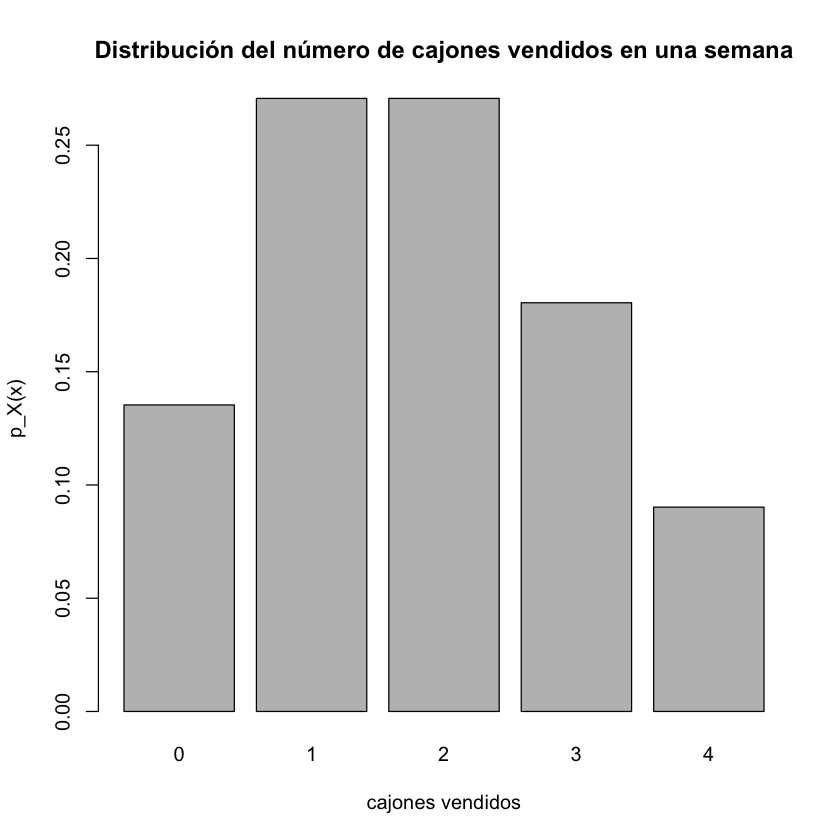

In [971]:
barplot(dpois(0:4, 2), main='Distribución del número de cajones vendidos en una semana', xlab='cajones vendidos', ylab='p_X(x)', names.arg=0:4)

In [982]:
matrix(c(0:4, dpois(0:4, 2)), nrow=5, ncol=2)

0,0.13533528
1,0.27067057
2,0.27067057
3,0.18044704
4,0.09022352


### Pregunta D

¿Con cuántos cajones debería iniciar la semana a fin de que la probabilidad de cumplir con todos sus pedidos fuese mayor o igual que 0.99?

In [992]:
x = 0
repeat {
    if (ppois(x, 2) >= 0.99) break
    x = x + 1
}
x

[1] 6